<a href="https://colab.research.google.com/github/Chanda92/Data-Science-Projects/blob/master/Heart_disease_prediction/Heart_disease__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#import dataset

import os

os.environ['KAGGLE_USERNAME'] = "chandabakshi" # username from the json file

os.environ['KAGGLE_KEY'] = "ff81813a84c08d29cf3330a9d2f8bc17" # key from the json file

!kaggle datasets download -d ronitf/heart-disease-uci # api copied from kaggle

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 1.29MB/s]


In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "heart-disease-uci.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
heart.csv                                      2019-10-01 20:15:10        11328
Extracting all the files now...
Done!


In [ ]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Deal with Missing Data
df.isnull().sum().any().sum()    # There is no missing values

0

In [ ]:
healthy = df[df['target']== 0].count()[1]
sick = df[df['target']== 1].count()[1]
print(" No Heart Problem" ,healthy)
print("Heart Problem" ,sick)

 No Heart Problem 138
Heart Problem 165


In [ ]:
per_healthy = (healthy*100)/303
per_sick = (sick*100)/303
print("Percentage having no heart issues" ,per_healthy)
print("Percentage having heart issues" ,per_sick)

Percentage having no heart issues 45.54455445544554
Percentage having heart issues 54.45544554455446


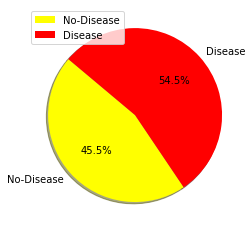

In [ ]:

from matplotlib import pyplot as plt
# Plot
percentage = [ per_healthy, per_sick]
color = ["yellow", "red"]
labels = [ "No-Disease", "Disease"]
plt.pie(percentage, labels=labels, colors=color,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(loc= "upper left")
plt.show()


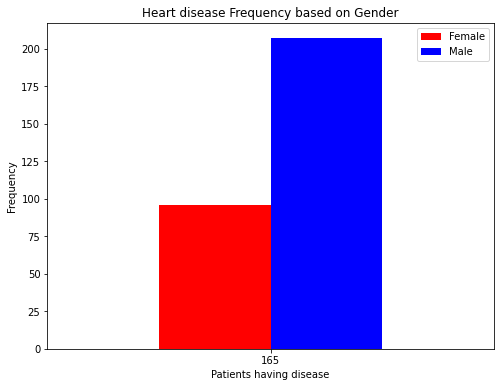

In [ ]:
# Check the data how much sex having disease

pd.crosstab(sick,df['sex']).plot(kind='bar', figsize=(8,6),color=['red','blue'])
plt.xlabel("Patients having disease")
plt.ylabel("Frequency")
plt.title("Heart disease Frequency based on Gender")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

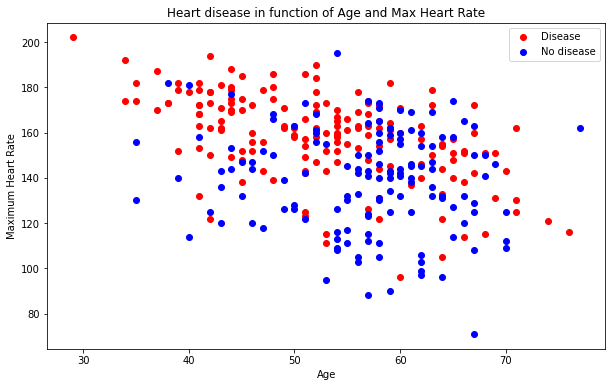

In [ ]:
# thalach means maximum heart rate and here we determined the whom have the maximum heart rate according to age
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1],df.thalach[df.target==1],c='red');
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='blue');
plt.title('Heart disease in function of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(['Disease','No disease']);

In [ ]:
numeric_columns = ['age','trestbps', 'chol', 'fbs', 'thalach', 'oldpeak']
categorical_columns = [i for i in df.columns if i not in numeric_columns]
print(categorical_columns)

['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


Through heatmap, I notice a negative correlation between 'age' and 'max_heart_rate(thalach)' whereas positive correlation between 'age' and 'blood_pressure', what is intuitive.

Apart from this ,'age' and 'max_heart_rate(thalach)', will play an important role in predicting heart disease.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


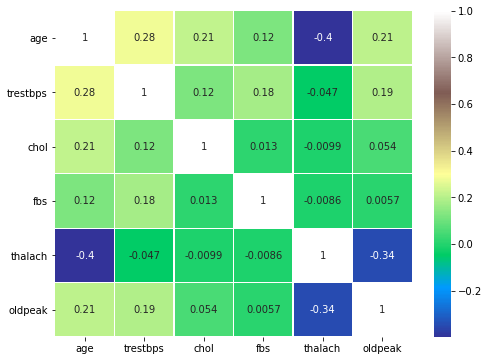

In [ ]:
import seaborn as sns
# create a correlation heatmap
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

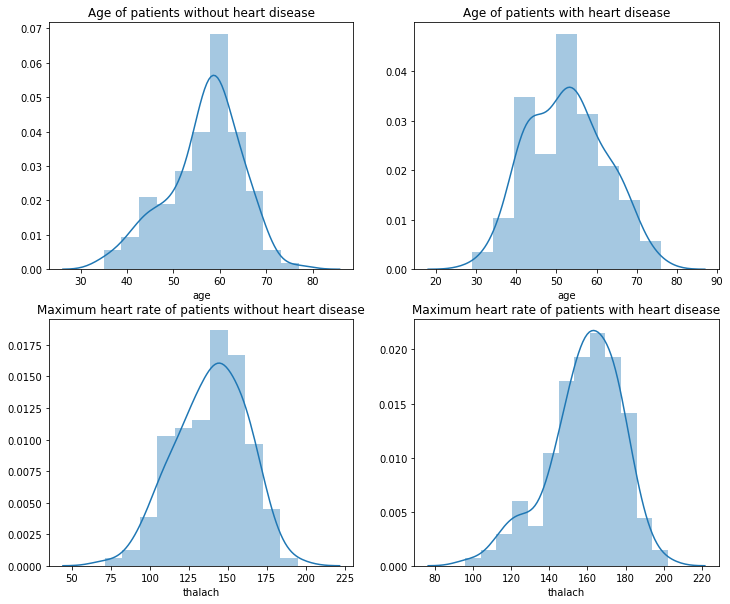

In [ ]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Maximum heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Maximum heart rate of patients with heart disease')
plt.show()


#**Age distribution of healthy patients is much wider than ill people. The latter are at the highest risk in their sixties. Max heart rate distribution does not differ as much, but the risk is on the peaks when max_heart_rate value is between 150 and 175. Higher values are more common for well patients.**

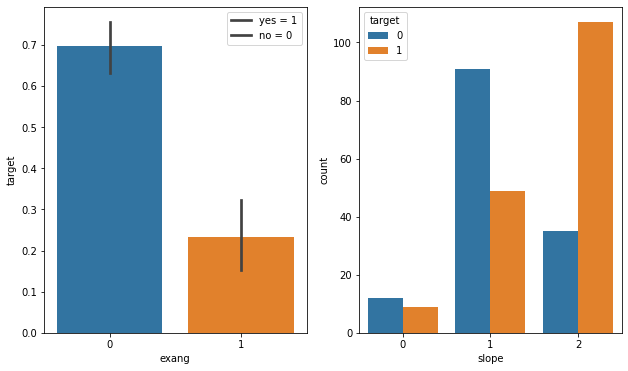

In [ ]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
#plt.subplot(131)
#sns.plot(x="sex", y="target", hue='cp', data=df)
#plt.legend(['1 = Male', '0 = Female'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=df)
plt.show()

**Observations**:
1) Men are much more effective to get a heart disease as compared to women.

2) The higher number of vessels detected through fluoroscopy, the higher risk of disease.

3) While soft chest pain may be a bad symptoms of approaching problems with heart (especially in case of men), strong pain is a serious warning!

4) Risk of getting heart disease might be even 3x higher for someone who experienced exercise-induced angina.

5) The flat slope (value=2) and downslope (value=3) of the peak exercise indicates a high risk of getting disease

In [ ]:
# create training and testing vars
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print(train.shape)
print(test.shape)

(242, 14)
(61, 14)


In [ ]:
train.isnull().sum().any().sum()
test.isnull().sum().any().sum()

0

#**Data Processing**

In [ ]:
# creating a new feature named as "origin" 

train['origin'] = 0
test['origin'] = 1
train_data =train.drop(['target'],axis=1) # Dropping the target variable
test_data =test.drop(['target'],axis=1) # Dropping the target variable

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
## Random sample from training and test data
training = train_data.sample(242, random_state=12)
testing = test_data.sample(61, random_state=11)

In [ ]:
combi.isnull().sum().any()
print(combi)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
14    58    0   3       150   283  ...      0      1.0      2   0     2
79    58    1   2       105   240  ...      1      0.6      1   0     3
4     57    0   0       120   354  ...      1      0.6      2   0     2
175   40    1   0       110   167  ...      1      2.0      1   0     3
159   56    1   1       130   221  ...      0      0.0      2   0     3
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
265   66    1   0       112   212  ...      1      0.1      2   1     2
230   47    1   2       108   243  ...      0      0.0      2   0     2
259   38    1   3       120   231  ...      1      3.8      1   0     3
10    54    1   0       140   239  ...      0      1.2      2   0     2
273   58    1   0       100   234  ...      0      0.1      2   1     3

[303 rows x 13 columns]


In [ ]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)  # Dropping the new field "origin" from merging data

In [ ]:
# Handling missing data
import numpy as np
for i in combi.columns:
    if(combi[i].dtype == 'object'):
      combi[i] = combi[i].fillna(combi[i].mode().iloc[0])
    if((combi[i].dtype == 'int') or (combi[i].dtype == 'float')):
      combi[i] = combi[i].fillna(np.mean(combi[i]))

print('Nulls in combined set:', combi.isnull().sum().sum())

Nulls in combined set: 0


In [ ]:
print(combi)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
14    58    0   3       150   283  ...      0      1.0      2   0     2
79    58    1   2       105   240  ...      1      0.6      1   0     3
4     57    0   0       120   354  ...      1      0.6      2   0     2
175   40    1   0       110   167  ...      1      2.0      1   0     3
159   56    1   1       130   221  ...      0      0.0      2   0     3
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
265   66    1   0       112   212  ...      1      0.1      2   1     2
230   47    1   2       108   243  ...      0      0.0      2   0     2
259   38    1   3       120   231  ...      1      3.8      1   0     3
10    54    1   0       140   239  ...      0      1.2      2   0     2
273   58    1   0       100   234  ...      0      0.1      2   1     3

[303 rows x 13 columns]


In [ ]:
## modelling
import numpy as np
from sklearn.model_selection import cross_val_score
from pandas import Series, DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combi.columns:  # identify the features acquired more than 0.8 roc-auc score 
    score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=5,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

#**There is no Covariate Shift available in dataset. So, we go further for accuracy check**

In [ ]:
from sklearn.model_selection import train_test_split
# create training and testing vars
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(242, 14) (242,)
(61, 14) (61,)
(242, 14) (242,)
(61, 14) (61,)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**# Apply KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  2]
 [ 1 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.93      0.96      0.95        27

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61

Accuracy: 0.9508196721311475
